In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [379]:
df = pd.read_csv('WorkOrder.csv')
df.head()

,docno,ddate,cur_time,slno,ord_cl,storecode,workno,worksfx,mtcode,cntcode,...,net_wt,stn_wt,dia_wt,plt_wt,slv_wt,due_dt,doc_stat,brcode,designcode,Unnamed: 31
0,I00027/09-10,01-04-2009 00:00,01-04-2009 16:44,1,PR/3738/1/08-09,1,111,A,GLD,PR,...,37.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1,NaN,NaN
1,I00028/09-10,01-04-2009 00:00,01-04-2009 16:45,1,PR/3461/1/08-09,1,25,A,GLD,PR,...,12.0,0.0,0.0,0.0,0.0,10-04-2009 00:00,,1,NaN,NaN
2,I00029/09-10,01-04-2009 00:00,01-04-2009 16:46,1,HAR/1723/1/08-09,1,161,A,GLD,HAR,...,45.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1,NaN,NaN
3,I00029/09-10,01-04-2009 00:00,01-04-2009 16:46,2,HAR/1723/2/08-09,1,161,A,GLD,HAR,...,75.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1,NaN,NaN
4,I00030/09-10,01-04-2009 00:00,01-04-2009 16:48,1,HAR/1722/1/08-09,1,176,A,GLD,HAR,...,90.0,0.0,0.0,0.0,0.0,10-04-2009 00:00,,1,NaN,NaN


In [381]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233187 entries, 0 to 233186
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   docno        233187 non-null  object 
 1   ddate        233187 non-null  object 
 2   cur_time     233187 non-null  object 
 3   slno         233187 non-null  int64  
 4   ord_cl       233187 non-null  object 
 5   storecode    233187 non-null  int64  
 6   workno       233187 non-null  int64  
 7   worksfx      233187 non-null  object 
 8   mtcode       233187 non-null  object 
 9   cntcode      233187 non-null  object 
 10  grpcode      233187 non-null  object 
 11  itemcode     233187 non-null  object 
 12  itemname     233187 non-null  object 
 13  ord_detl     211336 non-null  object 
 14  qty          233187 non-null  object 
 15  unit         233187 non-null  object 
 16  wtperunit    233187 non-null  object 
 17  size         208909 non-null  object 
 18  carret       233187 non-

In [383]:
df.drop(columns=['cur_time','slno','storecode','worksfx'],inplace=True)

In [385]:
df = df.iloc[:,0:-2]

In [387]:
df.xrx_sam.value_counts()

xrx_sam
          156091
Xerox      70296
Sample      6799
22             1
Name: count, dtype: int64

In [389]:
df.drop(columns=['itemname','unit','size','l_limit','u_limit'],inplace=True)

In [391]:
df.doc_stat.value_counts()

doc_stat
                    233186
28-11-2019 00:00         1
Name: count, dtype: int64

In [393]:
df=df[df.doc_stat!='28-11-2019 00:00']

In [395]:
df.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,ord_detl,qty,...,carret,xrx_sam,net_wt,stn_wt,dia_wt,plt_wt,slv_wt,due_dt,doc_stat,brcode
0,I00027/09-10,01-04-2009 00:00,PR/3738/1/08-09,111,GLD,PR,M,M00024,"FIVE LINE WITH FACE,DN.APX REF.MI-7265/8",1,...,22,,37.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1
1,I00028/09-10,01-04-2009 00:00,PR/3461/1/08-09,25,GLD,PR,RC,RC0001,GENT'S RING D/N A.P.X REF.RCI-2416/8,1,...,22,,12.0,0.0,0.0,0.0,0.0,10-04-2009 00:00,,1
2,I00029/09-10,01-04-2009 00:00,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,D/N.A.P.X. WITH'S',2,...,22,,45.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1
3,I00029/09-10,01-04-2009 00:00,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,"(CHELLA GATTA) WITH 'S', D/N.A.P.X.",1,...,22,,75.0,0.0,0.0,0.0,0.0,14-04-2009 00:00,,1
4,I00030/09-10,01-04-2009 00:00,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,"WITH'S', D/N.A.P.X.",1,...,22,,90.0,0.0,0.0,0.0,0.0,10-04-2009 00:00,,1


In [397]:
df.brcode.value_counts()

brcode
1    216803
1     16383
Name: count, dtype: int64

In [399]:
df.drop(columns = ['ord_detl','brcode','doc_stat'],inplace=True)

In [401]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233186 entries, 0 to 233186
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   docno      233186 non-null  object 
 1   ddate      233186 non-null  object 
 2   ord_cl     233186 non-null  object 
 3   workno     233186 non-null  int64  
 4   mtcode     233186 non-null  object 
 5   cntcode    233186 non-null  object 
 6   grpcode    233186 non-null  object 
 7   itemcode   233186 non-null  object 
 8   qty        233186 non-null  object 
 9   wtperunit  233186 non-null  object 
 10  carret     233186 non-null  object 
 11  xrx_sam    233186 non-null  object 
 12  net_wt     233186 non-null  float64
 13  stn_wt     233186 non-null  float64
 14  dia_wt     233186 non-null  float64
 15  plt_wt     233186 non-null  float64
 16  slv_wt     233186 non-null  float64
 17  due_dt     233186 non-null  object 
dtypes: float64(5), int64(1), object(12)
memory usage: 33.8+ MB


In [403]:
df = df[~((df.stn_wt>0) | (df.dia_wt>0) | (df.plt_wt>0) | (df.slv_wt>0))]

In [405]:
df[((df.stn_wt>0) | (df.dia_wt>0) | (df.plt_wt>0) | (df.slv_wt>0))]

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,stn_wt,dia_wt,plt_wt,slv_wt,due_dt


In [407]:
df.drop(columns=['stn_wt','dia_wt','plt_wt','slv_wt'],inplace=True)
df.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,01-04-2009 00:00,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,,37.0,14-04-2009 00:00
1,I00028/09-10,01-04-2009 00:00,PR/3461/1/08-09,25,GLD,PR,RC,RC0001,1,12.0,22,,12.0,10-04-2009 00:00
2,I00029/09-10,01-04-2009 00:00,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,,45.0,14-04-2009 00:00
3,I00029/09-10,01-04-2009 00:00,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,,75.0,14-04-2009 00:00
4,I00030/09-10,01-04-2009 00:00,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,,90.0,10-04-2009 00:00


In [409]:
worker_df = df.workno.value_counts()

In [411]:
worker_df = pd.DataFrame(worker_df)
worker_df

,count
workno,
501,13382
55,8509
111,7381
24,6805
71,6436
...,...
105,1
141,1
6,1


In [413]:
worker_df = worker_df.reset_index()
worker_df.columns=['worker','cnt']
worker_df

,worker,cnt
0,501,13382
1,55,8509
2,111,7381
3,24,6805
4,71,6436
...,...,...
214,105,1
215,141,1
216,6,1
217,33,1


In [415]:
df.ddate = pd.to_datetime(df.ddate,format = '%d-%m-%Y %H:%M')
df.due_dt = pd.to_datetime(df.due_dt,format = '%d-%m-%Y %H:%M')

In [417]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233165 entries, 0 to 233186
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   docno      233165 non-null  object        
 1   ddate      233165 non-null  datetime64[ns]
 2   ord_cl     233165 non-null  object        
 3   workno     233165 non-null  int64         
 4   mtcode     233165 non-null  object        
 5   cntcode    233165 non-null  object        
 6   grpcode    233165 non-null  object        
 7   itemcode   233165 non-null  object        
 8   qty        233165 non-null  object        
 9   wtperunit  233165 non-null  object        
 10  carret     233165 non-null  object        
 11  xrx_sam    233165 non-null  object        
 12  net_wt     233165 non-null  float64       
 13  due_dt     233165 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(10)
memory usage: 26.7+ MB


In [419]:
max(df.ddate)

Timestamp('2021-03-31 00:00:00')

#### Considering only those workers who are active in last one year

In [422]:
latest_workers = df.groupby('workno')[['ddate']].max().reset_index()
latest_workers['days'] = (max(df.ddate) - latest_workers.ddate).dt.days
latest_workers = latest_workers[latest_workers.days<=365]
latest_workers = pd.DataFrame(latest_workers.workno).reset_index(drop=True)

In [423]:
df_new = pd.merge(left=df,right=latest_workers,how='inner')

In [425]:
df_new.shape

(207512, 14)

In [428]:
df_new.workno.value_counts()

workno
501    13382
55      8509
111     7381
24      6805
71      6436
       ...  
466       20
309       17
54        13
123        8
77         6
Name: count, Length: 121, dtype: int64

In [430]:
df_new.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,,37.0,2009-04-14
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,,45.0,2009-04-14
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,,75.0,2009-04-14
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,,90.0,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,,70.0,2009-04-10


In [432]:
df_new[df_new.workno==51].groupby('grpcode')[['docno']].count()

,docno
grpcode,
B,3
BC,27
BN,5
EC,7
EN,6
HA,152
HB,540
HC,59
HD,1


In [434]:
df_new[df_new.workno==51].groupby('cntcode')[['docno']].count()

,docno
cntcode,
,130
BG,29
BK,3
DTS,8
EX,13
GEN,1
HAR,722
LJ,1
MS,2


In [436]:
df_new.carret.value_counts()

carret
22    187316
       13452
18      4822
6        961
24       705
10       120
14       113
21        19
9          4
Name: count, dtype: int64

In [438]:
df_new[df_new.cntcode=='   ']

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
14,I00041/09-10,2009-04-01,STN/B192/1/08-09,52,GLD,,YR,YR0006,1,5.0,6,,5.0,2009-04-06
24,I00107/09-10,2009-04-03,S-HAR/0119/2/08-,176,GLD,,HC,HC0270,1,35.0,22,Xerox,35.0,2009-04-10
25,I00108/09-10,2009-04-03,S-HAR/B119/1/08-09,70,GLD,,HC,HC0186,1,30.0,22,Xerox,30.0,2009-04-10
26,I00108/09-10,2009-04-03,S-HAR/B125/1/08-09,70,GLD,,HC,HC0186,1,28.0,22,,28.0,2009-04-10
27,I00109/09-10,2009-04-03,S-HAR/B120/1/08-0,153,GLD,,HB,HB0154,8,10.0,22,Xerox,80.0,2009-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207507,I03153/14-15,2014-06-10,S-PR/R005/3/14-15,251,GLD,,PC,PC0036,2,29.0,22,Xerox,58.0,2014-06-24
207508,I03158/14-15,2014-06-10,S-PR/R005/1/14-15,267,GLD,,PC,PC0034,2,15.0,22,Xerox,30.0,2014-06-24
207509,I03163/14-15,2014-06-10,S-PR/R005/2/14-15,71,GLD,,PC,PC0036,10,12.5,22,Xerox,125.0,2014-06-24
207510,I03163/14-15,2014-06-10,S-PR/R005/3/14-15,71,GLD,,PC,PC0036,3,17.0,22,Xerox,51.0,2014-06-24


In [440]:
df_new.shape[0] / df_new[df_new.cntcode=='   '].shape[0]

6.838875523184919

In [442]:
#get counter code
counter = df_new.groupby(['cntcode','grpcode'])[['docno']].count().reset_index()
groupmax = counter.groupby('grpcode')[['docno']].max().reset_index()

In [444]:
dictcnt = {}
def getcounter(x):
    cnt = counter[(counter.docno==x.docno) & (counter.grpcode==x.grpcode)]['cntcode'].values[0]
    dictcnt[x.grpcode] = cnt
groupmax.apply(lambda x: getcounter(x),axis=1)

0      None
1      None
2      None
3      None
4      None
       ... 
184    None
185    None
186    None
187    None
188    None
Length: 189, dtype: object

In [446]:
df_new

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,,37.0,2009-04-14
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,,45.0,2009-04-14
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,,75.0,2009-04-14
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,,90.0,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,,70.0,2009-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207507,I03153/14-15,2014-06-10,S-PR/R005/3/14-15,251,GLD,,PC,PC0036,2,29.0,22,Xerox,58.0,2014-06-24
207508,I03158/14-15,2014-06-10,S-PR/R005/1/14-15,267,GLD,,PC,PC0034,2,15.0,22,Xerox,30.0,2014-06-24
207509,I03163/14-15,2014-06-10,S-PR/R005/2/14-15,71,GLD,,PC,PC0036,10,12.5,22,Xerox,125.0,2014-06-24
207510,I03163/14-15,2014-06-10,S-PR/R005/3/14-15,71,GLD,,PC,PC0036,3,17.0,22,Xerox,51.0,2014-06-24


In [448]:
def extract_cnt(x):
    if x.cntcode=='   ':
        return dictcnt[x.grpcode]
    else:
        return x.cntcode

extracted_cnt = df_new.apply(lambda x: extract_cnt(x), axis=1)

In [450]:
df_new['cntcode'] = extracted_cnt

In [452]:
df_new = df_new[df_new.cntcode!='   ']
df_new.shape

(206104, 14)

In [454]:
df_new.cntcode.value_counts()

cntcode
PR     36770
BK     35870
HAR    30795
MS     30771
GEN    21547
REP    11340
CH      8088
BG      8019
EX      6425
GL      5719
DIA     3709
DTS     3028
STN     2143
LJ      1666
KBC      114
SPL       89
SLV        8
SS         2
JEW        1
Name: count, dtype: int64

In [456]:
df_new.grpcode.value_counts()

grpcode
M      30677
B      19476
K      18728
N      18089
HC     12908
       ...  
SSR        1
hd         1
EJS        1
JNR        1
LPH        1
Name: count, Length: 174, dtype: int64

In [458]:
df_new[df_new.grpcode=='   ']

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt


In [460]:
df_new[df_new.xrx_sam=='      ']

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,,37.0,2009-04-14
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,,45.0,2009-04-14
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,,75.0,2009-04-14
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,,90.0,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,,70.0,2009-04-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207489,I02281/14-15,2014-05-14,S-CH/0001/7/14-15,138,GLD,CH,C,C00002,1,37.5,22,,37.5,2014-05-24
207490,I02282/14-15,2014-05-14,S-HAR/0008/2/14-15,433,GLD,HAR,HD,HD0095,5,11.0,22,,55.0,2014-05-24
207491,I02777/14-15,2014-05-28,S-HAR/0024/3/14-15,229,GLD,HAR,HE,HE0091,2,60.0,22,,120.0,2014-06-07
207492,I02780/14-15,2014-05-28,S-GEN/0041/1/14-15,61,GLD,GEN,N,N00009,1,170.0,22,,170.0,2014-06-10


In [462]:
df_new['xrx_sam'] = df_new.xrx_sam.str.replace('      ','Verbal')

In [464]:
df_new.xrx_sam.value_counts()

xrx_sam
Verbal    141804
Xerox      58606
Sample      5694
Name: count, dtype: int64

In [466]:
df_new.reset_index(drop=True,inplace=True)

In [468]:
df_new.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10


In [470]:
df_new.isna().sum()

docno        0
ddate        0
ord_cl       0
workno       0
mtcode       0
cntcode      0
grpcode      0
itemcode     0
qty          0
wtperunit    0
carret       0
xrx_sam      0
net_wt       0
due_dt       0
dtype: int64

In [472]:
df_new.mtcode.value_counts()

mtcode
GLD    206061
STN        24
SLV        14
PLT         5
Name: count, dtype: int64

In [476]:
df_new.to_csv('WOCleaned.csv',index=False)

#### start with cleaned data

In [88]:
df_new = pd.read_csv('.\WOCleaned.csv')
df_new.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10


In [89]:
receipt = pd.read_csv('receipt.csv')

In [90]:
receipt.head()

,docno,ddate,cur_time,slno,wrkord_no,ord_cl,due_dt,i_type,itemname,qty,...,mak_char,mak_date,mak_user,workno,worksfx,storecode,mtcode,doc_stat,brcode,marking
0,I00033/09-10,01-04-2009 00:00,01-04-2009 16:06,3,,RPR/0849/1/08-09,NaN,REPR,RING,1.0,...,40.0,28-04-2009 00:00,CHANDRIKAR,132,A,7,GLD,,1.0,N
1,I00033/09-10,01-04-2009 00:00,01-04-2009 16:06,4,,RD/0206/1/08-09,NaN,REPR,RING,1.0,...,40.0,28-04-2009 00:00,CHANDRIKAR,132,A,7,GLD,,1.0,N
2,I00034/09-10,01-04-2009 00:00,01-04-2009 17:08,1,,RN/284/1/08-09,NaN,REPR,RING,1.0,...,10.0,28-04-2009 00:00,CHANDRIKAR,24,A,3,GLD,,1.0,N
3,I00035/09-10,01-04-2009 00:00,01-04-2009 17:09,1,,RS/74/1/08-09,NaN,REPR,SANKHA,1.0,...,10.0,28-04-2009 00:00,CHANDRIKAR,24,A,3,GLD,,1.0,N
4,I00036/09-10,01-04-2009 00:00,01-04-2009 17:10,1,,RN/289/1/08-09,NaN,REPR,EARRING,1.0,...,10.0,28-04-2009 00:00,CHANDRIKAR,24,A,3,GLD,,1.0,N


In [91]:
receipt.isna().sum()

docno             0
ddate             0
cur_time          0
slno              0
wrkord_no         0
ord_cl            0
due_dt       145508
i_type            0
itemname          0
qty               0
unit              0
carret            0
gr_wt             0
misc_wt           0
net_wt            0
loss_4_wt         0
loss_4            0
loss_oth          0
tot_wt            0
goldrt            0
loss_val          0
rate_gm           0
mak_char          0
mak_date      81089
mak_user      81090
workno            0
worksfx           0
storecode         0
mtcode            0
doc_stat          1
brcode            1
marking           1
dtype: int64

In [92]:
receipt.shape

(369636, 32)

In [93]:
receipt = receipt[['ddate','ord_cl','qty','net_wt','tot_wt','workno']]

In [94]:
receipt.head()

,ddate,ord_cl,qty,net_wt,tot_wt,workno
0,01-04-2009 00:00,RPR/0849/1/08-09,1.0,0.0,0.0,132
1,01-04-2009 00:00,RD/0206/1/08-09,1.0,0.0,0.0,132
2,01-04-2009 00:00,RN/284/1/08-09,1.0,0.0,0.0,24
3,01-04-2009 00:00,RS/74/1/08-09,1.0,0.0,0.0,24
4,01-04-2009 00:00,RN/289/1/08-09,1.0,0.0,0.0,24


In [95]:
receipt['ddate'] = pd.to_datetime(receipt.ddate,format = '%d-%m-%Y %H:%M')
receipt.head()

,ddate,ord_cl,qty,net_wt,tot_wt,workno
0,2009-04-01,RPR/0849/1/08-09,1.0,0.0,0.0,132
1,2009-04-01,RD/0206/1/08-09,1.0,0.0,0.0,132
2,2009-04-01,RN/284/1/08-09,1.0,0.0,0.0,24
3,2009-04-01,RS/74/1/08-09,1.0,0.0,0.0,24
4,2009-04-01,RN/289/1/08-09,1.0,0.0,0.0,24


In [96]:
receipt.rename(columns = {'ddate':'rdate'},inplace=True)

In [97]:
receipt.ord_cl.nunique()

194276

In [98]:
receipt = receipt.iloc[:,0:2]
receipt.head()

,rdate,ord_cl
0,2009-04-01,RPR/0849/1/08-09
1,2009-04-01,RD/0206/1/08-09
2,2009-04-01,RN/284/1/08-09
3,2009-04-01,RS/74/1/08-09
4,2009-04-01,RN/289/1/08-09


In [99]:
df_new.shape,receipt.shape

((206104, 14), (369636, 2))

In [100]:
receipt = receipt.groupby('ord_cl')[['rdate']].max().reset_index()

In [101]:
receipt.tail()

,ord_cl,rdate
194271,Y/S SET RING,2013-08-02
194272,ZIRCON SET RING,2019-05-27
194273,[,2017-01-12
194274,[R/0321/1/15-16,2015-12-01
194275,\,2020-10-15


In [102]:
receipt.iloc[2000:2025]

,ord_cl,rdate
2000,BG/0384/1/15-16,2015-10-02
2001,BG/0385/1/16-17,2017-02-21
2002,BG/0385/1/17-18,2017-12-26
2003,BG/0385/1/19-20,2020-06-23
2004,BG/0385/2/19-20,2020-07-07
2005,BG/0386/1/14-15,2014-12-10
2006,BG/0386/1/16-17,2017-02-28
2007,BG/0386/1/17-18,2017-12-29
2008,BG/0387/1/12-13,2012-12-01
2009,BG/0387/1/16-17,2017-02-07


In [103]:
df_all = pd.merge(left=df_new,right=receipt,left_on='ord_cl',right_on='ord_cl',how='left')
df_all.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14,2009-04-09
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14,2009-04-10
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14,2009-04-10
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10,2009-04-10


In [104]:
df_all.isna().sum()

docno            0
ddate            0
ord_cl           0
workno           0
mtcode           0
cntcode          0
grpcode          0
itemcode         0
qty              0
wtperunit        0
carret           0
xrx_sam          0
net_wt           0
due_dt           0
rdate        14948
dtype: int64

In [105]:
206104-14948

191156

In [106]:
df_all = df_all.dropna()
df_all.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14,2009-04-09
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14,2009-04-10
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14,2009-04-10
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10,2009-04-10
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10,2009-04-10


In [107]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191156 entries, 0 to 206103
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   docno      191156 non-null  object        
 1   ddate      191156 non-null  object        
 2   ord_cl     191156 non-null  object        
 3   workno     191156 non-null  int64         
 4   mtcode     191156 non-null  object        
 5   cntcode    191156 non-null  object        
 6   grpcode    191156 non-null  object        
 7   itemcode   191156 non-null  object        
 8   qty        191156 non-null  int64         
 9   wtperunit  191156 non-null  float64       
 10  carret     191156 non-null  object        
 11  xrx_sam    191156 non-null  object        
 12  net_wt     191156 non-null  float64       
 13  due_dt     191156 non-null  object        
 14  rdate      191156 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(2), object(10)
memory usage: 23.3

In [108]:
df_all.due_dt = pd.to_datetime(df_all.due_dt, format='%Y-%m-%d')

In [109]:
df_all.ddate = pd.to_datetime(df_all.ddate, format='%Y-%m-%d')
df_all.due_dt = pd.to_datetime(df_all.due_dt, format='%Y-%m-%d')

In [110]:
(df_all.rdate - df_all.ddate).dt.days

0          8
1          9
2          9
3          9
4          9
          ..
206099    31
206100    30
206101    20
206102    31
206103    37
Length: 191156, dtype: int64

In [111]:
df_all['duration'] = (df_all.rdate - df_all.ddate).dt.days
df_all['lateby'] = (df_all.rdate - df_all.due_dt).dt.days
df_all.head()

,docno,ddate,ord_cl,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate,duration,lateby
0,I00027/09-10,2009-04-01,PR/3738/1/08-09,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14,2009-04-09,8,-5
1,I00029/09-10,2009-04-01,HAR/1723/1/08-09,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14,2009-04-10,9,-4
2,I00029/09-10,2009-04-01,HAR/1723/2/08-09,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14,2009-04-10,9,-4
3,I00030/09-10,2009-04-01,HAR/1722/1/08-09,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10,2009-04-10,9,0
4,I00030/09-10,2009-04-01,HAR/1722/2/08-09,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10,2009-04-10,9,0


In [112]:
df_all = df_all.iloc[:,3:]
df_all.head()

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate,duration,lateby
0,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14,2009-04-09,8,-5
1,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14,2009-04-10,9,-4
2,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14,2009-04-10,9,-4
3,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10,2009-04-10,9,0
4,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10,2009-04-10,9,0


In [113]:
df_all.lateby.max(),df_all.lateby.min()

(3855, -5467)

In [114]:
df_all.lateby.mean(),df_all.lateby.median()

(35.5642773441587, 7.0)

In [115]:
df_all[df_all.lateby==-5467]

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate,duration,lateby
201457,111,GLD,REP,M,M00024,1,24.3,,Sample,24.3,2029-02-14,2014-02-26,4,-5467


<Axes: >

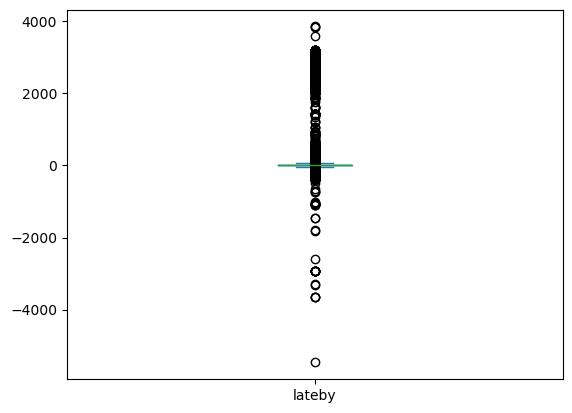

In [116]:
df_all.lateby.plot(kind='box')

In [117]:
def outliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    lc = q1 - (1.5*iqr)
    uc = q3 + (1.5*iqr)
    return lc,uc

lc,uc = outliers(df_all.lateby)
lc,uc

(-33.5, 58.5)

In [118]:
df_all[(df_all.lateby < lc) | (df_all.lateby > uc)]

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate,duration,lateby
54,320,GLD,GEN,N,N00012,5,40.0,22,Verbal,200.0,2009-04-15,2018-01-17,3213,3199
55,320,GLD,GEN,N,N00012,1,50.0,22,Verbal,50.0,2009-04-15,2018-01-17,3213,3199
110,106,GLD,HAR,L,L00056,5,4.0,22,Xerox,20.0,2009-04-11,2009-11-21,231,224
136,41,GLD,HAR,HC,HC0186,4,16.0,22,Xerox,64.0,2009-04-11,2009-12-26,266,259
181,126,GLD,BK,K,K00022,1,28.0,22,Xerox,28.0,2009-04-16,2018-01-17,3208,3198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206072,86,GLD,MS,M,M00003,5,9.0,22,Verbal,45.0,2014-05-24,2014-07-23,75,60
206073,24,GLD,MS,M,M00003,4,10.0,22,Verbal,40.0,2014-05-24,2014-08-06,89,74
206087,229,GLD,HAR,HE,HE0091,2,60.0,22,Verbal,120.0,2014-06-07,2014-10-09,134,124
206088,61,GLD,GEN,N,N00009,1,170.0,22,Verbal,170.0,2014-06-10,2015-01-13,230,217


In [119]:
df_all = df_all[(df_all.lateby >= lc) & (df_all.lateby <= uc)]
df_all.reset_index(drop=True,inplace=True)
df_all.head()

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,due_dt,rdate,duration,lateby
0,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,2009-04-14,2009-04-09,8,-5
1,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,2009-04-14,2009-04-10,9,-4
2,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,2009-04-14,2009-04-10,9,-4
3,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,2009-04-10,2009-04-10,9,0
4,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,2009-04-10,2009-04-10,9,0


In [120]:
df_all.shape

(163428, 14)

In [121]:
df_all.columns

Index(['workno', 'mtcode', 'cntcode', 'grpcode', 'itemcode', 'qty',
       'wtperunit', 'carret', 'xrx_sam', 'net_wt', 'due_dt', 'rdate',
       'duration', 'lateby'],
      dtype='object')

In [122]:
df_all = df_all[['workno', 'mtcode', 'cntcode', 'grpcode', 'itemcode', 'qty','wtperunit', 'carret', 'xrx_sam', 'net_wt','duration','lateby']]

In [123]:
df_all['wrk_cat'] = pd.cut(df_all.lateby,bins=3)

In [124]:
df_all['wrk_cat'].value_counts()

wrk_cat
(-2.667, 27.667]     119466
(-33.091, -2.667]     26165
(27.667, 58.0]        17797
Name: count, dtype: int64

In [125]:
df_all['wrk_cat'] = pd.qcut(df_all.lateby,3)

In [126]:
df_all['wrk_cat'].value_counts()

wrk_cat
(-33.001, 2.0]    60988
(11.0, 58.0]      51755
(2.0, 11.0]       50685
Name: count, dtype: int64

In [127]:
minlate = df_all.lateby.min()
maxlate = df_all.lateby.max()
df_all['wrk_cat'] = pd.cut(df_all.lateby,[minlate-1,-2,5,maxlate+1],labels=['early','ontime','late'])
df_all['wrk_cat'].value_counts()

wrk_cat
late      81406
ontime    50677
early     31345
Name: count, dtype: int64

In [128]:
df_all.head()

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,net_wt,duration,lateby,wrk_cat
0,111,GLD,PR,M,M00024,1,37.0,22,Verbal,37.0,8,-5,early
1,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,45.0,9,-4,early
2,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,75.0,9,-4,early
3,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,90.0,9,0,ontime
4,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,70.0,9,0,ontime


In [129]:
df_all.isna().sum()

workno       0
mtcode       0
cntcode      0
grpcode      0
itemcode     0
qty          0
wtperunit    0
carret       0
xrx_sam      0
net_wt       0
duration     0
lateby       0
wrk_cat      0
dtype: int64

In [130]:
duration = df_all.duration

In [188]:
df_feat = df_all.iloc[:,0:-4]
df_feat = pd.concat([df_feat,pd.DataFrame(duration)],axis=1)
df_feat.head()

,workno,mtcode,cntcode,grpcode,itemcode,qty,wtperunit,carret,xrx_sam,duration
0,111,GLD,PR,M,M00024,1,37.0,22,Verbal,8
1,161,GLD,HAR,HC,HC0191,2,22.5,22,Verbal,9
2,161,GLD,HAR,HC,HC0191,1,75.0,22,Verbal,9
3,176,GLD,HAR,HC,HC0124,1,90.0,22,Verbal,9
4,176,GLD,HAR,HC,HC0107,1,70.0,22,Verbal,9


In [189]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163428 entries, 0 to 163427
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   workno     163428 non-null  int64  
 1   mtcode     163428 non-null  object 
 2   cntcode    163428 non-null  object 
 3   grpcode    163428 non-null  object 
 4   itemcode   163428 non-null  object 
 5   qty        163428 non-null  int64  
 6   wtperunit  163428 non-null  float64
 7   carret     163428 non-null  object 
 8   xrx_sam    163428 non-null  object 
 9   duration   163428 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 12.5+ MB


In [190]:
df_feat.drop(columns=['grpcode'],inplace=True)
df_feat.drop(columns='cntcode',inplace=True)

In [191]:
from sklearn.preprocessing import LabelEncoder

In [192]:
catcol=['mtcode','itemcode','carret','xrx_sam']
label_mapping={}
col_mapping={}
for col in catcol:
    le = LabelEncoder()
    df_feat[col] = le.fit_transform(df_feat[col])
    d1 = dict(zip(le.classes_,sorted(df_feat[col].unique())))
    label_mapping.update(d1)
    col_mapping[col] = le.classes_

In [193]:
col_mapping

{'mtcode': array(['GLD', 'PLT', 'SLV', 'STN'], dtype=object),
 'itemcode': array(['A00001', 'A00002', 'A00003', ..., 'YR0015', 'YR0017', 'YSS001'],
       dtype=object),
 'carret': array(['  ', '10', '14', '18', '21', '22', '24', '6', '9'], dtype=object),
 'xrx_sam': array(['Sample', 'Verbal', 'Xerox '], dtype=object)}

In [142]:
df_feat.head()

,workno,mtcode,itemcode,qty,wtperunit,carret,xrx_sam,duration
0,111,0,738,1,37.0,5,1,8
1,161,0,406,2,22.5,5,1,9
2,161,0,406,1,75.0,5,1,9
3,176,0,352,1,90.0,5,1,9
4,176,0,337,1,70.0,5,1,9


<Axes: >

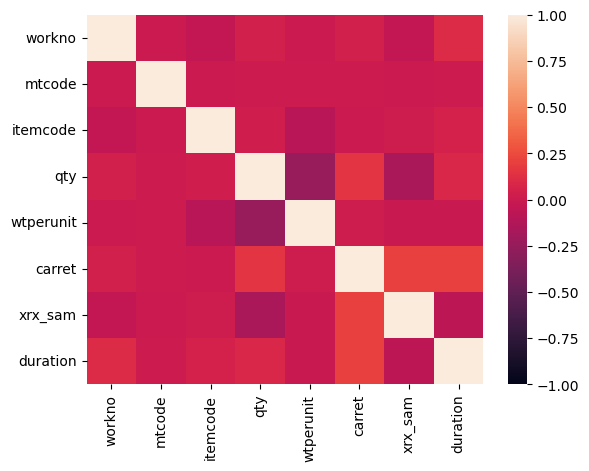

In [143]:
sns.heatmap(df_feat.corr(),vmax=1,vmin=-1)

In [144]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163428 entries, 0 to 163427
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   workno     163428 non-null  int64  
 1   mtcode     163428 non-null  int32  
 2   itemcode   163428 non-null  int32  
 3   qty        163428 non-null  int64  
 4   wtperunit  163428 non-null  float64
 5   carret     163428 non-null  int32  
 6   xrx_sam    163428 non-null  int32  
 7   duration   163428 non-null  int64  
dtypes: float64(1), int32(4), int64(3)
memory usage: 7.5 MB


In [145]:
le_y = LabelEncoder()
df_all['wrk_cat'] = le_y.fit_transform(df_all.wrk_cat)
label_y = dict(zip(le_y.classes_,sorted(df_all.wrk_cat.unique())))

In [146]:
label_y

{'early': 0, 'late': 1, 'ontime': 2}

In [57]:
df_all.wrk_cat.value_counts()

wrk_cat
1    81406
2    50677
0    31345
Name: count, dtype: int64

In [58]:
Y = df_all.wrk_cat

In [59]:
from sklearn.preprocessing import StandardScaler

In [60]:
ss = StandardScaler()
X = ss.fit_transform(df_feat)
X = pd.DataFrame(X)
X.columns = df_feat.columns
X.head()

,workno,mtcode,itemcode,qty,wtperunit,carret,xrx_sam,duration
0,-0.534262,-0.011378,0.522280,-0.565584,0.429992,0.290093,-0.533924,-0.895340
1,-0.201810,-0.011378,-0.461762,-0.335121,-0.088013,0.290093,-0.533924,-0.825875
2,-0.201810,-0.011378,-0.461762,-0.565584,1.787523,0.290093,-0.533924,-0.825875
3,-0.102075,-0.011378,-0.621817,-0.565584,2.323391,0.290093,-0.533924,-0.825875
4,-0.102075,-0.011378,-0.666277,-0.565584,1.608901,0.290093,-0.533924,-0.825875


In [61]:
Y.value_counts()

wrk_cat
1    81406
2    50677
0    31345
Name: count, dtype: int64

#### Model training

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.20,stratify=Y,random_state=24)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((130742, 8), (32686, 8), (130742,), (32686,))

In [66]:
ytrain.value_counts()

wrk_cat
1    65125
2    40541
0    25076
Name: count, dtype: int64

In [67]:
ytest.value_counts()

wrk_cat
1    16281
2    10136
0     6269
Name: count, dtype: int64

In [135]:
#from imblearn.over_sampling import SMOTE

In [137]:
#oversample = SMOTE()

In [139]:
#xover,yover = oversample.fit_resample(xtrain,ytrain)
#xover.shape,yover.shape

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=5,class_weight='balanced')
dt.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_split=5)

In [70]:
pred_dt = dt.predict(xtest)
pred_dt

array([1, 1, 0, ..., 0, 0, 1])

In [71]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [72]:
acc = accuracy_score(ytest,pred_dt)
pre = precision_score(ytest,pred_dt,average='macro')
rec = recall_score(ytest,pred_dt,average='macro')
f1 = f1_score(ytest,pred_dt,average='macro')
acc,pre,rec,f1

(0.7627424585449428, 0.7289659952074077, 0.744294502529359, 0.7348145051248681)

In [73]:
pd.DataFrame(pred_dt).value_counts()

1    14888
2    10585
0     7213
Name: count, dtype: int64

In [74]:
ytest.value_counts()

wrk_cat
1    16281
2    10136
0     6269
Name: count, dtype: int64

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
rf = RandomForestClassifier(n_estimators=70,max_depth=5,min_samples_split=3,max_features=4)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=5, max_features=4, min_samples_split=3,
                       n_estimators=70)

In [77]:
pred_rf = rf.predict(xtest)
pred_rf

array([1, 1, 0, ..., 0, 0, 1])

In [78]:
acc = accuracy_score(ytest,pred_rf)
pre = precision_score(ytest,pred_rf,average='macro')
rec = recall_score(ytest,pred_rf,average='macro')
f1 = f1_score(ytest,pred_rf,average='macro')
acc,pre,rec,f1

(0.7760203145077403,
 0.7440834945693412,
 0.7395026587790129,
 0.7416829048812179)

In [79]:
pd.Series(pred_rf).value_counts()

1    16448
2    10224
0     6014
Name: count, dtype: int64

In [166]:
from xgboost import XGBClassifier

In [168]:
xg = XGBClassifier(n_estimators=80,max_depth=5,reg_lambda=3,reg_alpha=2.5)
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [170]:
pred_xg = xg.predict(xtest)
pred_xg

array([1, 1, 0, ..., 0, 0, 1], dtype=int64)

In [172]:
acc = accuracy_score(ytest,pred_xg)
pre = precision_score(ytest,pred_xg,average='macro')
rec = recall_score(ytest,pred_xg,average='macro')
f1 = f1_score(ytest,pred_xg,average='macro')
acc,pre,rec,f1

(0.7857186563054519,
 0.7577734199692073,
 0.7444597642696827,
 0.7502118770797087)

In [174]:
pd.Series(pred_xg).value_counts()

1    16654
2    10466
0     5566
Name: count, dtype: int64

In [132]:
from sklearn.svm import SVC

In [133]:
sv = SVC()
sv.fit(xtrain,ytrain)

SVC()

In [134]:
pred_sv = sv.predict(xtest)
pred_sv

array([1, 1, 0, ..., 0, 0, 1])

In [135]:
pre = precision_score(ytest,pred_sv,average='macro')
rec = recall_score(ytest,pred_sv,average='macro')
f1 = f1_score(ytest,pred_sv,average='macro')
pre,rec,f1

(0.7549187988077201, 0.7261383952419713, 0.7356029487126983)

In [136]:
pd.Series(pred_sv).value_counts()

1    16533
2    11402
0     4751
Name: count, dtype: int64

In [179]:
from sklearn.neighbors import KNeighborsClassifier

In [181]:
kn = KNeighborsClassifier(n_neighbors=5,p=2)
kn.fit(xtrain,ytrain)

KNeighborsClassifier()

In [182]:
pred_kn = kn.predict(xtest)
pred_kn

array([1, 1, 0, ..., 0, 0, 1])

In [184]:
pre = precision_score(ytest,pred_kn,average='macro')
rec = recall_score(ytest,pred_kn,average='macro')
f1 = f1_score(ytest,pred_kn,average='macro')
pre,rec,f1

(0.7149378418803849, 0.7111072820180381, 0.7128966984180011)

In [187]:
pd.Series(pred_kn).value_counts()

1    16706
2     9895
0     6085
Name: count, dtype: int64

In [176]:
from keras.models import Sequential
from keras.layers import Dense

In [190]:
model = Sequential()
model.add(Dense(16,input_dim=8,name='input_layer1',activation='relu'))
model.add(Dense(8,name='hidden_layer1',activation='relu'))
model.add(Dense(3,activation='softmax'))
 

In [192]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer1 (Dense)                 │ (None, 16)                  │             144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer1 (Dense)                │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [196]:
Y1 = pd.get_dummies(Y,dtype=int)
xtrain1,xtest1,ytrain1,ytest1 = train_test_split(X,Y1,test_size=0.20,stratify=Y1,random_state=24)
xtrain1.shape,xtest1.shape,ytrain1.shape,ytest1.shape

((130742, 8), (32686, 8), (130742, 3), (32686, 3))

In [198]:
model.fit(xtrain1,ytrain1,batch_size=64,epochs=5)

Epoch 1/5
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6496 - loss: 0.7126
Epoch 2/5
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7768 - loss: 0.5073
Epoch 3/5
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7785 - loss: 0.5008
Epoch 4/5
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7768 - loss: 0.5023
Epoch 5/5
2043/2043 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7781 - loss: 0.4990


In [200]:
model.evaluate(xtest1,ytest1)

1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7709 - loss: 0.5115


[0.5052439570426941, 0.7730526924133301]

In [202]:
pred_nn = model.predict(xtest1)
pred_nn

1022/1022 ━━━━━━━━━━━━━━━━━━━━ 1s 852us/step


array([[0.07963749, 0.1597335 , 0.76062906],
       [0.3184991 , 0.02354266, 0.6579582 ],
       [0.6841329 , 0.00601691, 0.30985025],
       ...,
       [0.01530468, 0.81048375, 0.17421162],
       [0.00437881, 0.8949476 , 0.10067356],
       [0.34449998, 0.10479514, 0.55070496]], dtype=float32)

In [204]:
pred_nn=np.argmax(pred_nn,axis=1)
pred_nn

array([2, 2, 0, ..., 1, 1, 2], dtype=int64)

In [206]:
pd.Series(pred_nn).value_counts()

1    16721
2    10905
0     5060
Name: count, dtype: int64

In [208]:
label_y

{'early': 0, 'late': 1, 'ontime': 2}

In [236]:
ytest.value_counts()

wrk_cat
1    16281
2    10136
0     6269
Name: count, dtype: int64

In [210]:
pd.Series(pred_rf).value_counts()

1    16415
2    10256
0     6015
Name: count, dtype: int64

In [212]:
pd.Series(pred_xg).value_counts()

1    16654
2    10466
0     5566
Name: count, dtype: int64

#### Going for Random Forest

In [149]:
import pickle

In [81]:
with open('delivery_promptness_rf.pkl','wb') as file:
    pickle.dump(rf,file)

In [82]:
retrived_model = pickle.load(open('delivery_promptness_rf.pkl','rb'))

In [83]:
retrived_model.predict(xtest)

array([1, 1, 0, ..., 0, 0, 1])

In [147]:
df_feat.head()

,workno,mtcode,itemcode,qty,wtperunit,carret,xrx_sam,duration
0,111,0,738,1,37.0,5,1,8
1,161,0,406,2,22.5,5,1,9
2,161,0,406,1,75.0,5,1,9
3,176,0,352,1,90.0,5,1,9
4,176,0,337,1,70.0,5,1,9


In [148]:
label_y

{'early': 0, 'late': 1, 'ontime': 2}

In [150]:
with open('workerselection_mapping.pkl','wb') as file:
    pickle.dump(label_mapping,file)

In [152]:
lmap = pickle.load(open('workerselection_mapping.pkl','rb'))

In [194]:
with open('workerselection_colmapping.pkl','wb') as file:
    pickle.dump(col_mapping,file)

In [195]:
cmap = pickle.load(open('workerselection_colmapping.pkl','rb'))